In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
! pip install plotly==4.4.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.3 MB 22.6 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
ERROR: Operation cancelled by user


In [ ]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species")
fig.show()

In [ ]:
import numpy as np 
import pandas as pd 
import os
#import matplotlib.pyplot as plt 
import seaborn as sns 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import re
import nltk
from nltk.corpus import stopwords
from tqdm import tqdm
from nltk.stem import WordNetLemmatizer
import spacy


/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning:

Can't initialize NVML



In [ ]:
tqdm.pandas()
spacy_eng = spacy.load("en_core_web_sm")
nltk.download('stopwords')
lemm = WordNetLemmatizer()
#init_notebook_mode(connected=True)
sns.set_style("darkgrid")
#plt.rcParams['figure.figsize'] = (20,8)
#plt.rcParams['font.size'] = 18
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
path_training='/content/drive/MyDrive/Colab Notebooks/Web Mining/SarcasmDetection/Competition 1-december/English_data/train.En.csv'
path_testing='/content/drive/MyDrive/Colab Notebooks/Web Mining/SarcasmDetection/Competition 1-december/English_data/task_A_En_test.csv'
data=pd.read_csv(path_training)
test_data=pd.read_csv(path_testing)

In [ ]:
data

,Unnamed: 0,tweet,sarcastic,rephrase,sarcasm,irony,satire,understatement,overstatement,rhetorical_question
0,0,The only thing I got from college is a caffein...,1,"College is really difficult, expensive, tiring...",0.0,1.0,0.0,0.0,0.0,0.0
1,1,I love it when professors draw a big question ...,1,I do not like when professors don’t write out ...,1.0,0.0,0.0,0.0,0.0,0.0
2,2,Remember the hundred emails from companies whe...,1,"I, at the bare minimum, wish companies actuall...",0.0,1.0,0.0,0.0,0.0,0.0
3,3,Today my pop-pop told me I was not “forced” to...,1,"Today my pop-pop told me I was not ""forced"" to...",1.0,0.0,0.0,0.0,0.0,0.0
4,4,@VolphanCarol @littlewhitty @mysticalmanatee I...,1,I would say Ted Cruz is an asshole and doesn’t...,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
3463,3463,The population spike in Chicago in 9 months is...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3464,3464,You'd think in the second to last English clas...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3465,3465,I’m finally surfacing after a holiday to Scotl...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3466,3466,Couldn't be prouder today. Well done to every ...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.set_index('Unnamed: 0', inplace=True)

In [ ]:
data.head()

,tweet,sarcastic,rephrase,sarcasm,irony,satire,understatement,overstatement,rhetorical_question
Unnamed: 0,,,,,,,,,
0,The only thing I got from college is a caffein...,1,"College is really difficult, expensive, tiring...",0.0,1.0,0.0,0.0,0.0,0.0
1,I love it when professors draw a big question ...,1,I do not like when professors don’t write out ...,1.0,0.0,0.0,0.0,0.0,0.0
2,Remember the hundred emails from companies whe...,1,"I, at the bare minimum, wish companies actuall...",0.0,1.0,0.0,0.0,0.0,0.0
3,Today my pop-pop told me I was not “forced” to...,1,"Today my pop-pop told me I was not ""forced"" to...",1.0,0.0,0.0,0.0,0.0,0.0
4,@VolphanCarol @littlewhitty @mysticalmanatee I...,1,I would say Ted Cruz is an asshole and doesn’t...,1.0,0.0,0.0,0.0,0.0,0.0


#1-EDA and Text Preprocessing

## 1-1 Checking for Missing Values¶

In [ ]:
data.isnull().sum()

tweet                     1
sarcastic                 0
rephrase               2601
sarcasm                2601
irony                  2601
satire                 2601
understatement         2601
overstatement          2601
rhetorical_question    2601
dtype: int64

In [ ]:
data = data.dropna(axis=0, subset=['tweet'])

In [ ]:
data.isnull().sum()

tweet                     0
sarcastic                 0
rephrase               2600
sarcasm                2600
irony                  2600
satire                 2600
understatement         2600
overstatement          2600
rhetorical_question    2600
dtype: int64

## 1-2 Finding the Classes Balance/Imbalance

In [ ]:
data.groupby('sarcastic').count()

,tweet,rephrase,sarcasm,irony,satire,understatement,overstatement,rhetorical_question
sarcastic,,,,,,,,
0,2600,0,0,0,0,0,0,0
1,867,867,867,867,867,867,867,867


In [ ]:
test_data.groupby('sarcastic').count()

,text
sarcastic,
0,1200
1,200


In [ ]:
px.bar(data.groupby('sarcastic').count().reset_index(),x='tweet',title='Count of Sarcastic and Genuine Headlines')

## 1-3 Special Characters Removal

<ul>
<li> We will not remove numbers from the text data right away, lets further analyse if they contain any relevant information </li><br>
<li> We can find the entity type of the tokens in the sentences using Named Entity Recognition (NER), this will help us identify the type and relevance of numbers in our text data</li> <br>
</ul>

In [ ]:
stop_words = stopwords.words('english')
stop_words.remove('not')

def text_cleaning(x):
    
    headline = re.sub('\s+\n+', ' ', str(x))
    headline = re.sub('[^a-zA-Z0-9]', ' ', str(x))
    headline = headline.lower()
    headline = headline.split()
    
    headline = [lemm.lemmatize(word, "v") for word in headline if not word in stop_words]
    headline = ' '.join(headline)
    
    return headline

In [ ]:
def get_entities(x):
    entity = []
    text = spacy_eng(str(x))
    for word in text.ents:
        entity.append(word.label_)
    return ",".join(entity)

data['entity'] = data['tweet'].progress_apply(get_entities)


100%|██████████| 3467/3467 [00:36<00:00, 95.79it/s]
<ipython-input-17-4f2077b3ee30>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data['clean_tweet'] = data['tweet'].apply(text_cleaning)
test_data['clean_tweet']=test_data['text'].apply(text_cleaning)

<ipython-input-18-9bbb26993468>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data['sentence_length'] = data['clean_tweet'].apply(lambda x: len(x.split()))
test_data['sentence_length'] = test_data['clean_tweet'].apply(lambda x: len(x.split()))


<ipython-input-19-b378a461bb4a>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data

,tweet,sarcastic,rephrase,sarcasm,irony,satire,understatement,overstatement,rhetorical_question,entity,clean_tweet,sentence_length
Unnamed: 0,,,,,,,,,,,,
0,The only thing I got from college is a caffein...,1,"College is really difficult, expensive, tiring...",0.0,1.0,0.0,0.0,0.0,0.0,,thing get college caffeine addiction,5
1,I love it when professors draw a big question ...,1,I do not like when professors don’t write out ...,1.0,0.0,0.0,0.0,0.0,0.0,,love professors draw big question mark next an...,13
2,Remember the hundred emails from companies whe...,1,"I, at the bare minimum, wish companies actuall...",0.0,1.0,0.0,0.0,0.0,0.0,"CARDINAL,PERSON,CARDINAL",remember hundred email company covid start get...,24
3,Today my pop-pop told me I was not “forced” to...,1,"Today my pop-pop told me I was not ""forced"" to...",1.0,0.0,0.0,0.0,0.0,0.0,DATE,today pop pop tell not force go college okay s...,11
4,@VolphanCarol @littlewhitty @mysticalmanatee I...,1,I would say Ted Cruz is an asshole and doesn’t...,1.0,0.0,0.0,0.0,0.0,0.0,"PERSON,GPE",volphancarol littlewhitty mysticalmanatee also...,16
...,...,...,...,...,...,...,...,...,...,...,...,...
3463,The population spike in Chicago in 9 months is...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"GPE,DATE",population spike chicago 9 months ridiculous,6
3464,You'd think in the second to last English clas...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"ORDINAL,LANGUAGE,DATE,PERSON",think second last english class year prof woul...,11
3465,I’m finally surfacing after a holiday to Scotl...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"GPE,DATE,DATE,DATE,DATE",finally surface holiday scotland difficult day...,26


In [ ]:
test_data

,text,sarcastic,clean_tweet,sentence_length
0,"Size on the the Toulouse team, That pack is mo...",0,size toulouse team pack monstrous see welsh re...,13
1,Pinball!,0,pinball,1
2,So the Scottish Government want people to get ...,1,scottish government want people get booster sh...,11
3,villainous pro tip : change the device name on...,0,villainous pro tip change device name bluetoot...,10
4,I would date any of these men 🥺,0,would date men,3
...,...,...,...,...
1395,I’ve just seen this and felt it deserved a Ret...,0,see felt deserve retweet honesty xx,6
1396,Omg how an earth is that a pen !!! 🤡,0,omg earth pen,3
1397,Bringing Kanye and drake to a tl near you,0,bring kanye drake tl near,5
1398,"I love it when women are referred to as ""girl ...",1,love women refer girl boss however men boss,8


## 1-3Headlines Length Distribution

<ul>
<li>Look for outlier length of tweet sentences   </li>
<li>Usually the tweets shouldn't be more than 20-30 words   </li>

</ul>

In [ ]:
px.histogram(data, x="sentence_length",height=700, color='sarcastic', title="tweet Length Distribution", marginal="box")


In [ ]:
px.histogram(test_data, x="sentence_length",height=700, color='sarcastic', title="tweet Length Distribution", marginal="box")

In [ ]:
data[data['sentence_length']==40]['tweet']

Unnamed: 0
1489    Excited to share the latest addition to my #et...
Name: tweet, dtype: object

In [ ]:
data.drop(data[data['sentence_length'] > 30].index, inplace = True)
data.reset_index(inplace=True, drop=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
test_data.drop(test_data[test_data['sentence_length'] > 30].index, inplace = True)
test_data.reset_index(inplace=True, drop=True)

In [ ]:
import numpy as np
print(np.max(data['sentence_length']))
print(np.max(test_data['sentence_length']))

30
30


## 1-4 Headlines Length Distribution: Outliers Removed

<ul>
<li>The headlines after the removal of outliers do not exceed the limit of 20-30 words</li>
<li>They are mostly centered in the range of 5-10 words</li>
</ul>

In [ ]:
px.histogram(data, x="sentence_length",height=700, color='sarcastic', title="Headlines Length Distribution", marginal="box")

## 1-5 Filtering: Find Sentences that Contain Numbers

In [ ]:
data['contains_number'] = data['clean_tweet'].apply(lambda x: bool(re.search(r'\d+', x)))
data

<ipython-input-29-c9d2564c2e64>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,tweet,sarcastic,rephrase,sarcasm,irony,satire,understatement,overstatement,rhetorical_question,entity,clean_tweet,sentence_length,contains_number
0,The only thing I got from college is a caffein...,1,"College is really difficult, expensive, tiring...",0.0,1.0,0.0,0.0,0.0,0.0,,thing get college caffeine addiction,5,False
1,I love it when professors draw a big question ...,1,I do not like when professors don’t write out ...,1.0,0.0,0.0,0.0,0.0,0.0,,love professors draw big question mark next an...,13,False
2,Remember the hundred emails from companies whe...,1,"I, at the bare minimum, wish companies actuall...",0.0,1.0,0.0,0.0,0.0,0.0,"CARDINAL,PERSON,CARDINAL",remember hundred email company covid start get...,24,False
3,Today my pop-pop told me I was not “forced” to...,1,"Today my pop-pop told me I was not ""forced"" to...",1.0,0.0,0.0,0.0,0.0,0.0,DATE,today pop pop tell not force go college okay s...,11,False
4,@VolphanCarol @littlewhitty @mysticalmanatee I...,1,I would say Ted Cruz is an asshole and doesn’t...,1.0,0.0,0.0,0.0,0.0,0.0,"PERSON,GPE",volphancarol littlewhitty mysticalmanatee also...,16,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3440,The population spike in Chicago in 9 months is...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"GPE,DATE",population spike chicago 9 months ridiculous,6,True
3441,You'd think in the second to last English clas...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"ORDINAL,LANGUAGE,DATE,PERSON",think second last english class year prof woul...,11,False
3442,I’m finally surfacing after a holiday to Scotl...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"GPE,DATE,DATE,DATE,DATE",finally surface holiday scotland difficult day...,26,True
3443,Couldn't be prouder today. Well done to every ...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"DATE,TIME,DATE,MONEY",prouder today well do every student get gcses ...,22,True


## 1-6 Analysis of Samples Containing numbers of Time, Date or Cardinal Entity type
<ul>
<li>The numbers in a text data can have different implications</li>
<li>While the naive text preprocessing methods suggest that the numbers should be removed along with the special characters</li>
<li>The entity type of these numbers should be identified to get their exact implications
</li>
</ul>

### 10 Random Samples: Date Entity

In [ ]:
data[(data['contains_number']) & (data['sentence_length']<=8) & (data['entity']=='DATE')].sample(10)

,tweet,sarcastic,rephrase,sarcasm,irony,satire,understatement,overstatement,rhetorical_question,entity,clean_tweet,sentence_length,contains_number
2693,10 years today since I left school. I’m in sho...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DATE,10 years today since leave school shock,7,True
454,nothing quite says hello 2020 like hypothermia 🥳,1,I would prefer to welcome the new year without...,0.0,1.0,0.0,0.0,0.0,0.0,DATE,nothing quite say hello 2020 like hypothermia,7,True
1503,The motto of 2021 is: “stop defending shitty m...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DATE,motto 2021 stop defend shitty men not debate,8,True
2758,The next 4 months just need to be skipped please,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DATE,next 4 months need skip please,6,True
1985,The further we get from the year 2000 the more...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DATE,get year 2000 confuse passage time,6,True
2649,if there isn’t a season 2 for never have I eve...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DATE,season 2 never ever netflix im go cry,8,True
610,I’m gonna miss scantrons shortening my name to...,1,I'm not going to miss scantrons shortening my ...,0.0,1.0,0.0,0.0,0.0,0.0,DATE,gonna miss scantrons shorten name christ 16 years,8,True
3198,#jackstack @TGIFridays 😍😍😍 https://t.co/J2Ycj5...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DATE,jackstack tgifridays https co j2ycj5wboe,5,True
3137,okay but my self esteem has multiplied by 7728...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DATE,okay self esteem multiply 772827 since get brace,8,True
2380,I despise 2021,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DATE,despise 2021,2,True


### 10 Random Samples: Time Entity

In [ ]:
data[(data['contains_number']) & (data['sentence_length']<=8) & (data['entity']=='TIME')].sample(10)

,tweet,sarcastic,rephrase,sarcasm,irony,satire,understatement,overstatement,rhetorical_question,entity,clean_tweet,sentence_length,contains_number
591,2 minutes into the book and I already hate the...,1,I do not enjoy the main character of this book.,0.0,1.0,0.0,0.0,0.0,0.0,TIME,2 minutes book already hate main character lovely,8,True
678,i love 6 hour panic attacks,1,I don't like having 6-hour panic attacks.,1.0,0.0,0.0,0.0,0.0,0.0,TIME,love 6 hour panic attack,5,True
2078,Look at me go. I've won myself afternoon tea! ...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TIME,look go afternoon tea http co h7xr5xrnnz,7,True
806,When you get woken up at 3am because of afters...,1,That was not fun being woken up at 3am because...,0.0,1.0,0.0,0.0,0.0,0.0,TIME,get wake 3am aftershocks earthquake,5,True
2981,I’ve been awake for 21 hours,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TIME,awake 21 hours,3,True
1041,"Got some beers in for the keynote, roll on 6pm",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TIME,get beers keynote roll 6pm,5,True
3277,"After 22 hours of travelling, it’s so nice to ...",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TIME,22 hours travel nice home,5,True
2736,#JoanneWorldTour I've literally been refreshin...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TIME,joanneworldtour literally refresh twitter 2 ho...,8,True
1537,#reputation is everything I needed before this...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TIME,reputation everything need 13 5 hour flight,7,True
1639,I need the weekends to stop being like 20 minu...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TIME,need weekend stop like 20 minutes long,7,True


### 10 Random Samples: Cardinal Entity

In [ ]:
data[(data['contains_number']) & (data['sentence_length']<=8) & (data['entity']=='CARDINAL')].sample(10)

,tweet,sarcastic,rephrase,sarcasm,irony,satire,understatement,overstatement,rhetorical_question,entity,clean_tweet,sentence_length,contains_number
2740,10 things i hate about you is the best movie o...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CARDINAL,10 things hate best movie time,6,True
2329,just rang 6 of my friends and none of them pic...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CARDINAL,ring 6 friends none pick https co etbeo4lqqk,8,True
228,I love when I start choking on my water in my ...,1,It was embarrassing when I choked on water in ...,1.0,0.0,0.0,0.0,0.0,0.0,CARDINAL,love start choke water 8 person class,7,True
265,WHO LET THE LAUNDRY PILE UP 5 BASKETS. Goodness.,1,Why did I let the laundry pile up 5 baskets?,1.0,0.0,0.0,0.0,0.0,0.0,CARDINAL,let laundry pile 5 baskets goodness,6,True
2170,In ​Bostrom's words: https://t.co/eqt6oEjwcX,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CARDINAL,bostrom word https co eqt6oejwcx,5,True
2364,one of my favs 💔 so sad https://t.co/y7RiY0JU4y,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CARDINAL,one favs sad https co y7riy0ju4y,6,True
719,I'm the highest I'll ever be on 420 in my life...,1,“I’m flying to [location]” because I was just ...,0.0,1.0,0.0,0.0,0.0,0.0,CARDINAL,highest ever 420 life airplane duh,6,True
2255,i’m still confused why 11 isn’t pronounced one...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CARDINAL,still confuse 11 pronounce onety one,6,True
2919,@CLBIsA10 @ItsGinjaNinja_ hes fucking horrible,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CARDINAL,clbisa10 itsginjaninja hes fuck horrible,5,True
29,just wondering how to get my diss down by 1500...,1,getting my diss down by 1500 words is not fun.,1.0,0.0,0.0,0.0,0.0,0.0,CARDINAL,wonder get diss 1500 word fun,6,True


>Inference: A lot of these headlines wouldn't make sense without these time,date or even cardinal numbers. For now we can let them be a part of our clean text data, in the next version of this notebook we will try to figure out if we can replace these numbers with specific tokens so that the meaning of them is not completely lost by removing them. Also the vocabulary size can be reduced after this step.

## 1- 7 Word Visualization: Word Clouds

In [ ]:
sarcastic = data[data['sarcastic']==1]['clean_tweet'].tolist()
genuine = data[data['sarcastic']==0]['clean_tweet'].tolist()

#### Top 50 Words: Sarcastic tweets

In [ ]:
import matplotlib.pyplot as plt


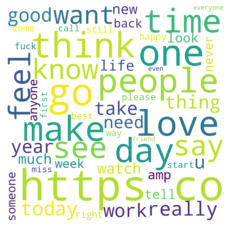

In [ ]:
wordcloud = WordCloud(max_words=50, width=800,height=800, background_color='white').generate(" ".join(genuine))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Top 50 Words: Genuine tweets

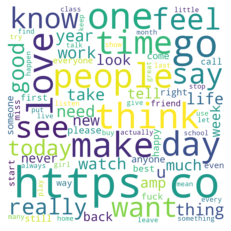

In [ ]:
wordcloud = WordCloud(max_words=80, width=1000,height=1000, background_color='white').generate(" ".join(genuine))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## 1-8  Model Building

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers
from tensorflow.keras.layers import Embedding, Layer, Dense, Dropout, MultiHeadAttention, LayerNormalization, Input, GlobalAveragePooling1D
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split

In [ ]:
sentences = data['clean_tweet']
label = data['sarcastic']

### Train - Validation - Test Splitting (80:10:10)

In [ ]:
#X_train, X_val, y_train, y_val = train_test_split(sentences, label, test_size=0.2, stratify=label, random_state=42)
#X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, stratify=y_val, random_state=42)

In [ ]:
X_train, y_train=sentences,label

In [ ]:
X_val,y_val=test_data['clean_tweet'],test_data['sarcastic']

### Tokenization
<ul>
<li>Splitting sentences into words</li>
<li>Finding the vocab size</li>

In [ ]:
max_len = 20
oov_token = '00_V' 
padding_type = 'post'
trunc_type = 'post'  

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
vocab_size = len(tokenizer.word_index) + 1
print("Vocab Size: ",vocab_size)

Vocab Size:  8760


### Encoding of Inputs
<ul>
<li>Converting the sentences to token followed by padded sequences in encoded format</li>
<li>
These are numeric encodings assigned to each word
</li>
</ul>

In [ ]:
train_sequences = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(train_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)

val_sequences = tokenizer.texts_to_sequences(X_val)
X_val = pad_sequences(val_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)

#test_sequences = tokenizer.texts_to_sequences(X_test)
#X_test = pad_sequences(test_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)

### **Transformers: Attention is all you need**
<ul>
For the purpose of classification problem we will only use the encoder block of the original transformers model (encoder-decoder) designed for sequence problems
</ul>

In [ ]:
class TransformerEncoder(layers.Layer):
    def __init__(self, embed_dim, heads, neurons):
        super(TransformerEncoder, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=heads, key_dim=embed_dim)
        self.ffn = Sequential(
            [layers.Dense(neurons, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(0.2)
        self.dropout2 = layers.Dropout(0.2)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)
    
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [ ]:
embed_dim = 50
heads = 2 
neurons = 32
maxlen = 10
vocab_size = 8940

inputs = layers.Input(shape=(maxlen,))
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerEncoder(embed_dim, heads, neurons)
x = transformer_block(x)
x = layers.GlobalAveragePooling1D()(x)
x = Dropout(0.5)(x)
x=Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = Model(inputs=inputs, outputs=outputs)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 10)]              0         
                                                                 
 token_and_position_embeddin  (None, 10, 50)           447500    
 g_1 (TokenAndPositionEmbedd                                     
 ing)                                                            
                                                                 
 transformer_encoder_1 (Tran  (None, 10, 50)           23832     
 sformerEncoder)                                                 
                                                                 
 global_average_pooling1d_1   (None, 50)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dropout_17 (Dropout)        (None, 50)                0   

In [ ]:
model_name = "model.h5"
checkpoint = ModelCheckpoint(model_name,
                            monitor="val_loss",
                            mode="min",
                            save_best_only = True,
                            verbose=1)

earlystopping = EarlyStopping(monitor='val_loss',min_delta = 0.001, patience = 1, verbose = 1)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.2, 
                                            min_lr=0.000000001)

In [ ]:
history = model.fit(X_train,y_train,
                    validation_data=(X_val,y_val),
                    epochs=10,
                    batch_size=32,
                    
                    )
#callbacks=[earlystopping]

Epoch 1/10
108/108 [==============================] - 4s 19ms/step - loss: 0.6170 - accuracy: 0.7155 - val_loss: 0.4375 - val_accuracy: 0.8588
Epoch 2/10
108/108 [==============================] - 2s 15ms/step - loss: 0.5891 - accuracy: 0.7358 - val_loss: 0.4245 - val_accuracy: 0.8588
Epoch 3/10
108/108 [==============================] - 2s 15ms/step - loss: 0.5687 - accuracy: 0.7396 - val_loss: 0.4247 - val_accuracy: 0.8588
Epoch 4/10
108/108 [==============================] - 1s 14ms/step - loss: 0.5523 - accuracy: 0.7463 - val_loss: 0.4197 - val_accuracy: 0.8581
Epoch 5/10
108/108 [==============================] - 2s 15ms/step - loss: 0.5376 - accuracy: 0.7527 - val_loss: 0.4584 - val_accuracy: 0.8552
Epoch 6/10
108/108 [==============================] - 1s 13ms/step - loss: 0.5272 - accuracy: 0.7544 - val_loss: 0.4509 - val_accuracy: 0.8552
Epoch 7/10
108/108 [==============================] - 1s 14ms/step - loss: 0.5037 - accuracy: 0.7634 - val_loss: 0.4487 - val_accuracy: 0.8538

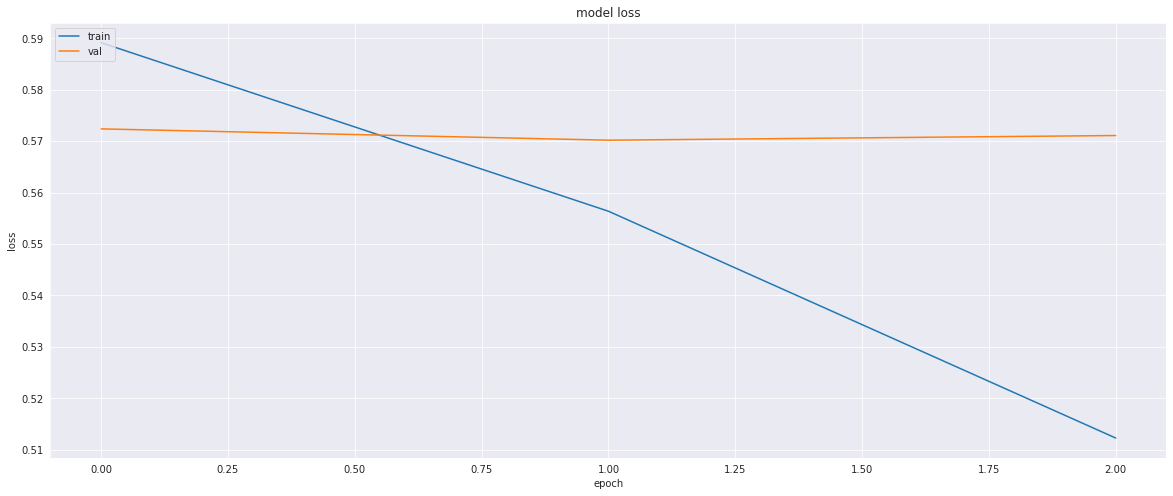

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Model 2 : 1-8 GLOVE and LSTM

In [ ]:
import numpy as np
import tensorflow
np.random.seed(0)
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Dropout, LSTM, Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.initializers import glorot_uniform
np.random.seed(1)

In [ ]:
sentences = data['clean_tweet']
label = data['sarcastic']

In [ ]:
print(len(sentences))

3445


In [ ]:
X_train,y_train=sentences,label
X_val,y_val=test_data['clean_tweet'],test_data['sarcastic']

### sentences to indices

In [ ]:
# UNQ_C3 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# GRADED FUNCTION: sentences_to_indices

def sentences_to_indices(X, word_to_index, max_len):
    """
    Converts an array of sentences (strings) into an array of indices corresponding to words in the sentences.
    The output shape should be such that it can be given to `Embedding()` (described in Figure 4). 
    
    Arguments:
    X -- array of sentences (strings), of shape (m, 1)
    word_to_index -- a dictionary containing the each word mapped to its index
    max_len -- maximum number of words in a sentence. You can assume every sentence in X is no longer than this. 
    
    Returns:
    X_indices -- array of indices corresponding to words in the sentences from X, of shape (m, max_len)
    """
    
    m = X.shape[0]                                   # number of training examples
    
    ### START CODE HERE ###
    # Initialize X_indices as a numpy matrix of zeros and the correct shape (≈ 1 line)
    X_indices = np.zeros((m, max_len))
    
    for i in range(m):                               # loop over training examples
        # Convert the ith training sentence in lower case and split is into words. You should get a list of words.
        sentence_words = X[i][0].lower().split()
        
        # Initialize j to 0
        j = 0
        
        # Loop over the words of sentence_words

        for w in sentence_words:
          if j<max_len:
            # if w exists in the word_to_index dictionary
            if w in word_to_index:
                # Set the (i,j)th entry of X_indices to the index of the correct word.
                X_indices[i, j] = word_to_index[w]
                # Increment j to j + 1
                j =  j + 1
            
    ### END CODE HERE ###
    
    return X_indices

### pretrained_embedding_layer

In [ ]:
# UNQ_C4 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# GRADED FUNCTION: pretrained_embedding_layer

def pretrained_embedding_layer(word_to_vec_map, word_to_index):
    """
    Creates a Keras Embedding() layer and loads in pre-trained GloVe 50-dimensional vectors.
    
    Arguments:
    word_to_vec_map -- dictionary mapping words to their GloVe vector representation.
    word_to_index -- dictionary mapping from words to their indices in the vocabulary (400,001 words)

    Returns:
    embedding_layer -- pretrained layer Keras instance
    """
    
    vocab_size = len(word_to_index) + 1              # adding 1 to fit Keras embedding (requirement)
    any_word = list(word_to_vec_map.keys())[0]
    emb_dim = word_to_vec_map[any_word].shape[0]    # define dimensionality of your GloVe word vectors (= 50)
      
    ### START CODE HERE ###
    # Step 1
    # Initialize the embedding matrix as a numpy array of zeros.
    # See instructions above to choose the correct shape.
    emb_matrix = np.zeros((vocab_size, emb_dim))
    
    # Step 2
    # Set each row "idx" of the embedding matrix to be 
    # the word vector representation of the idx'th word of the vocabulary
    for word, idx in word_to_index.items():
        emb_matrix[idx, :] = word_to_vec_map[word]

    # Step 3
    # Define Keras embedding layer with the correct input and output sizes
    # Make it non-trainable.
    embedding_layer = Embedding(vocab_size, emb_dim, trainable=False)
    ### END CODE HERE ###

    # Step 4 (already done for you; please do not modify)
    # Build the embedding layer, it is required before setting the weights of the embedding layer. 
    embedding_layer.build((None,)) # Do not modify the "None".  This line of code is complete as-is.
    
    # Set the weights of the embedding layer to the embedding matrix. Your layer is now pretrained.
    embedding_layer.set_weights([emb_matrix])
    
    return embedding_layer

### LSTM model

In [ ]:
# UNQ_C5 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# GRADED FUNCTION: Emojify_V2

def Emojify_V2(input_shape, word_to_vec_map, word_to_index):
    """
    Function creating the Emojify-v2 model's graph.
    
    Arguments:
    input_shape -- shape of the input, usually (max_len,)
    word_to_vec_map -- dictionary mapping every word in a vocabulary into its 50-dimensional vector representation
    word_to_index -- dictionary mapping from words to their indices in the vocabulary (400,001 words)

    Returns:
    model -- a model instance in Keras
    """
    
    ### START CODE HERE ###
    # Define sentence_indices as the input of the graph.
    # It should be of shape input_shape and dtype 'int32' (as it contains indices, which are integers).
    sentence_indices = Input(input_shape, dtype='int32')
    
    # Create the embedding layer pretrained with GloVe Vectors (≈1 line)
    embedding_layer = pretrained_embedding_layer(word_to_vec_map, word_to_index)
    
    # Propagate sentence_indices through your embedding layer
    # (See additional hints in the instructions).
    embeddings = embedding_layer(sentence_indices)   
    
    # Propagate the embeddings through an LSTM layer with 128-dimensional hidden state
    # The returned output should be a batch of sequences.
    X = LSTM(128, return_sequences=True)(embeddings)
    # Add dropout with a probability of 0.5
    X = Dropout(0.5)(X) 
    # Propagate X trough another LSTM layer with 128-dimensional hidden state
    # The returned output should be a single hidden state, not a batch of sequences.
    X = LSTM(128, return_sequences=False)(X)
    # Add dropout with a probability of 0.5
    X = Dropout(0.5)(X)
    X=Flatten()(X)
    X = Dense(128)(X)
    X = Dropout(0.5)(X)
    # Propagate X through a Dense layer with 5 units
    X = Dense(2)(X)
    # Add a softmax activation
    X = Activation('softmax')(X)
    
    # Create Model instance which converts sentence_indices into X.
    model = Model(sentence_indices, X)
    
    ### END CODE HERE ###
    
    return model


>Load GLOVE embedding

In [ ]:
def read_glove_vecs(glove_file):
    with open(glove_file, 'r') as f:
        words = set()
        word_to_vec_map = {}
        for line in f:
            line = line.strip().split()
            curr_word = line[0]
            words.add(curr_word)
            word_to_vec_map[curr_word] = np.array(line[1:], dtype=np.float64)
        
        i = 1
        words_to_index = {}
        index_to_words = {}
        for w in sorted(words):
            words_to_index[w] = i
            index_to_words[i] = w
            i = i + 1
    return words_to_index, index_to_words, word_to_vec_map

In [ ]:
maxLen=20
word_to_index, index_to_word, word_to_vec_map = read_glove_vecs('/content/drive/MyDrive/Colab Notebooks/Web Mining/SarcasmDetection/Competition 1-december/English_data/glove.6B.50d.txt')



In [ ]:
word = "cucumber"
idx = 2000
print("the index of", word, "in the vocabulary is", word_to_index[word])
print("the", str(idx) + "th word in the vocabulary is", index_to_word[idx])
print()

the index of cucumber in the vocabulary is 113317
the 2000th word in the vocabulary is 0.88



In [ ]:
model = Emojify_V2((maxLen,), word_to_vec_map, word_to_index)
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 20)]              0         
                                                                 
 embedding_11 (Embedding)    (None, 20, 50)            20000050  
                                                                 
 lstm_2 (LSTM)               (None, 20, 128)           91648     
                                                                 
 dropout_21 (Dropout)        (None, 20, 128)           0         
                                                                 
 lstm_3 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_22 (Dropout)        (None, 128)               0         
                                                                 
 flatten_8 (Flatten)         (None, 128)               0   

In [ ]:
import tensorflow as tf
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(1e-4), metrics=['accuracy'])

>Convert training labels to one-hot encoding

In [ ]:
def convert_to_one_hot(Y, C=2):
    Y = np.eye(C)[Y.reshape(-1)]
    return Y

In [ ]:

X_train=X_train.to_numpy().reshape(-1,1)
X_val=X_val.to_numpy().reshape(-1,1)
y_train=y_train.to_numpy()
y_val=y_val.to_numpy()

AttributeError: ignored

In [ ]:
print(X_train.shape,X_val.shape,y_train.shape,y_val.shape)

(3445, 1) (1395, 1) (3445,) (1395,)


In [ ]:
X_train_indices = sentences_to_indices(X_train, word_to_index, maxLen)
X_val_indices = sentences_to_indices(X_val, word_to_index, maxLen)
Y_train_oh = convert_to_one_hot(y_train, C = 2)
Y_val_oh = convert_to_one_hot(y_val, C = 2)

In [ ]:
print(X_train[:5])

[['thing get college caffeine addiction']
 ['love professors draw big question mark next answer exam always like yeah either']
 ['remember hundred email company covid start get real get three regard support protest savagexfenty share helpful link actually say black live matter love capitalism']
 ['today pop pop tell not force go college okay sure sureeee']
 ['volphancarol littlewhitty mysticalmanatee also report cancun cruz not worry heartbeats constituents without electricity heat flee mexico']]


In [ ]:
model.fit(X_train_indices, Y_train_oh, epochs = 1, batch_size = 32, shuffle=True)

108/108 [==============================] - 8s 72ms/step - loss: 0.5579 - accuracy: 0.7495


In [ ]:
X_val_indices = sentences_to_indices(X_val, word_to_index, max_len = maxLen)
Y_val_oh = convert_to_one_hot(y_val, C = 2)
loss, acc = model.evaluate(X_val_indices, Y_val_oh)
print()
print("Test accuracy = ", acc)

44/44 [==============================] - 1s 27ms/step - loss: 0.4631 - accuracy: 0.8566

Test accuracy =  0.856630802154541


In [ ]:
# This code allows you to see the mislabelled examples
C = 2
y_test_oh = np.eye(C)[y_val.reshape(-1)]
X_test_indices = sentences_to_indices(X_val, word_to_index, maxLen)
pred = model.predict(X_test_indices)
for i in range(len(X_val)):
    x = X_test_indices
    num = np.argmax(pred[i])
    if(num != y_val[i]):
        print('data: '+X_val[i]+' Expected : '+ str(y_val[i])+" actual "+str(num))

44/44 [==============================] - 0s 3ms/step
['data: sometimes lay bed think today day make life better exercise drink water eat healthy wake Expected : 1 actual 0']
['data: also shame media ignore prefer report study scientists whose model prove wrong Expected : 0 actual 1']
['data: wow chelsea bean beat west ham day look forward Expected : 0 actual 1']
['data: beauty wear mask responsible thing another layer warmth freeze trip work Expected : 0 actual 1']
['data: max verstappen clean driver never make dirty move race Expected : 1 actual 0']
['data: brrrr cold outside love Expected : 0 actual 1']
['data: boris look statesman like public address Expected : 1 actual 0']
['data: soo excite cook three course christmas dinner whole family year Expected : 1 actual 0']
['data: love bite torrone try go french call nougat Expected : 0 actual 1']
['data: flat completely trash theresa may Expected : 0 actual 1']
['data: life great lmaooooo Expected : 1 actual 0']
['data: thoughts prayers

>Model Séquentielle

In [ ]:
from keras.layers import Dense, Input, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D
from keras.models import Model, Sequential
from tensorflow.keras.callbacks import EarlyStopping
from keras import layers

model = Sequential()
model.add(Embedding(8760, 50, input_length = 20))

model.add(Flatten())
model.add(Dense(100, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(50, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(20, activation="relu",kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-2, l2=1e-2),))
model.add(Dropout(0.7))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

es = EarlyStopping(monitor="val_acc", mode="max", patience=3)
history = model.fit(X, Y, batch_size=64, epochs=5, validation_split=0.2, callbacks=[es])

Epoch 1/5
56/61 [==========================>...] - ETA: 0s - loss: 2.0667 - accuracy: 0.6878

61/61 [==============================] - 2s 16ms/step - loss: 2.0414 - accuracy: 0.6924 - val_loss: 1.5777 - val_accuracy: 0.8585
Epoch 2/5
58/61 [===========================>..] - ETA: 0s - loss: 1.4524 - accuracy: 0.7503

61/61 [==============================] - 1s 11ms/step - loss: 1.4427 - accuracy: 0.7515 - val_loss: 1.1091 - val_accuracy: 0.8585
Epoch 3/5
59/61 [============================>.] - ETA: 0s - loss: 1.0247 - accuracy: 0.7614

61/61 [==============================] - 1s 11ms/step - loss: 1.0216 - accuracy: 0.7614 - val_loss: 0.7613 - val_accuracy: 0.8585
Epoch 4/5
61/61 [==============================] - ETA: 0s - loss: 0.7366 - accuracy: 0.7616

61/61 [==============================] - 1s 12ms/step - loss: 0.7366 - accuracy: 0.7616 - val_loss: 0.5544 - val_accuracy: 0.8585
Epoch 5/5
57/61 [===========================>..] - ETA: 0s - loss: 0.5177 - accuracy: 0.7643

61/61 [==============================] - 1s 12ms/step - loss: 0.5153 - accuracy: 0.7616 - val_loss: 0.4875 - val_accuracy: 0.8585


In [ ]:
X=np.concatenate((X_train,X_val))
Y=np.concatenate((y_train,y_val))

In [ ]:
Y.shape

(4840,)

## Bert Model 

In [ ]:
!pip install transformers
import transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 14.4 MB/s 
     |████████████████████████████████| 7.6 MB 34.4 MB/s 
     |████████████████████████████████| 182 kB 60.8 MB/s 


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from transformers import TFBertModel, BertTokenizer
from sklearn.model_selection import train_test_split

In [ ]:
sentences = data['clean_tweet']
label = data['sarcastic']

In [ ]:
X_train,y_train=sentences,label
X_val,y_val=test_data['clean_tweet'],test_data['sarcastic']

In [ ]:
PRE_TRAINED_MODEL_NAME = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME,do_lower_case = True)

def encoder(sentences):
  ids = []
  for sentence in sentences:
    encoding = tokenizer.encode_plus(
    sentence,
    max_length=16,
    truncation = True,
    add_special_tokens=True,
    return_token_type_ids=False,
    pad_to_max_length=True,
    return_attention_mask=False)
    ids.append(encoding['input_ids'])
  return ids



train_ids = encoder(X_train)
test_ids = encoder(X_val) 


/usr/local/lib/python3.8/dist-packages/transformers/tokenization_utils_base.py:2336: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).



In [ ]:
X_train = tf.convert_to_tensor(train_ids)
X_val = tf.convert_to_tensor(test_ids)
y_train = tf.convert_to_tensor(y_train)
y_val = tf.convert_to_tensor(y_val)

In [ ]:
bert_encoder = TFBertModel.from_pretrained('bert-base-uncased')
input_word_ids = tf.keras.Input(shape=(16,), dtype=tf.int32, name="input_word_ids")  
embedding = bert_encoder([input_word_ids])
dense = tf.keras.layers.Lambda(lambda seq: seq[:, 0, :])(embedding[0])
dense = tf.keras.layers.Dense(128, activation='relu')(dense)
dense = tf.keras.layers.Dropout(0.2)(dense)   
output = tf.keras.layers.Dense(1, activation='sigmoid')(dense)    

model = tf.keras.Model(inputs=[input_word_ids], outputs=output)  

Downloading:   0%|          | 0.00/536M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
model.compile(tf.keras.optimizers.Adam(1e-5), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_word_ids (InputLayer)  [(None, 16)]             0         
                                                                 
 tf_bert_model (TFBertModel)  TFBaseModelOutputWithPoo  109482240
                             lingAndCrossAttentions(l            
                             ast_hidden_state=(None,             
                             16, 768),                           
                              pooler_output=(None, 76            
                             8),                                 
                              past_key_values=None, h            
                             idden_states=None, atten            
                             tions=None, cross_attent            
                             ions=None)                          
                                                           

In [ ]:
history = model.fit(x = X_train, y = y_train , epochs = 3, verbose = 1, batch_size = 32, validation_data = (X_val, y_val))

Epoch 1/3


108/108 [==============================] - 737s 7s/step - loss: 0.5799 - accuracy: 0.7446 - val_loss: 0.4367 - val_accuracy: 0.8588
Epoch 2/3
108/108 [==============================] - 714s 7s/step - loss: 0.5618 - accuracy: 0.7495 - val_loss: 0.4943 - val_accuracy: 0.8588
Epoch 3/3
108/108 [==============================] - 713s 7s/step - loss: 0.5404 - accuracy: 0.7486 - val_loss: 0.4437 - val_accuracy: 0.8616


In [ ]:
history = model.fit(x = X_train, y = y_train , epochs = 3, verbose = 1, batch_size = 32, validation_data = (X_val, y_val))

Epoch 1/3
108/108 [==============================] - 744s 7s/step - loss: 0.4903 - accuracy: 0.7707 - val_loss: 0.3967 - val_accuracy: 0.8595
Epoch 2/3
108/108 [==============================] - 713s 7s/step - loss: 0.4081 - accuracy: 0.8131 - val_loss: 0.4828 - val_accuracy: 0.8072
Epoch 3/3
108/108 [==============================] - 702s 7s/step - loss: 0.2846 - accuracy: 0.8848 - val_loss: 0.6128 - val_accuracy: 0.7183


In [ ]:
history = model.fit(x = X_train, y = y_train , epochs = 3, verbose = 1, batch_size = 32, validation_data = (X_val, y_val))

Epoch 1/3
108/108 [==============================] - 716s 7s/step - loss: 0.1790 - accuracy: 0.9347 - val_loss: 0.6627 - val_accuracy: 0.8029
Epoch 2/3
108/108 [==============================] - 712s 7s/step - loss: 0.1074 - accuracy: 0.9582 - val_loss: 0.8319 - val_accuracy: 0.7362
Epoch 3/3
108/108 [==============================] - 711s 7s/step - loss: 0.0820 - accuracy: 0.9710 - val_loss: 0.8999 - val_accuracy: 0.7448
